# Comparison of alpha-spending functions

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

from earlysign.stats.common.group_sequential.spending_functions import (
    OBrienFlemingSpending,
    HwangShihDeCaniSpending,
    KimDeMetsSpending,
)

Alpha = 0.05
# grid of information fractions
t = np.linspace(0.0, 1.0, 501)

In [3]:
# instantiate functions
obf = OBrienFlemingSpending(alpha=Alpha)
hsdc_gammas = [-5.0, -2.0, -1.0, 0.0, 1.0, 2.0, 5.0]
hsdc_objs = [HwangShihDeCaniSpending(alpha=Alpha, gamma=g) for g in hsdc_gammas]
kim_rhos = [0.5, 1.0, 2.0, 4.0]
kim_objs = [KimDeMetsSpending(alpha=Alpha, rho=r) for r in kim_rhos]


# helper to evaluate a spending object on the grid t
def eval_obj(obj, grid=t):
    return np.array([obj.cumulative(tt) for tt in grid])

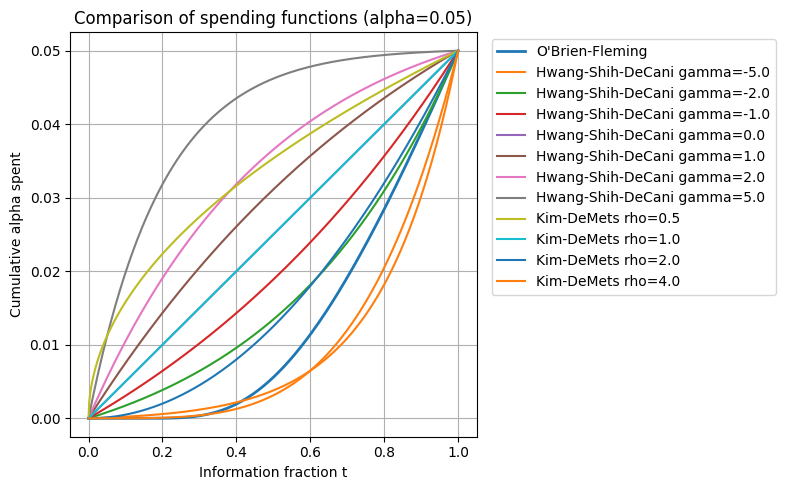

In [4]:
# Plot 1: all three families on one plot
plt.figure(figsize=(8, 5))
plt.plot(t, eval_obj(obf), label="O'Brien-Fleming", lw=2)
for g, obj in zip(hsdc_gammas, hsdc_objs):
    plt.plot(t, eval_obj(obj), label=f"Hwang-Shih-DeCani gamma={g}")
for r, obj in zip(kim_rhos, kim_objs):
    plt.plot(t, eval_obj(obj), label=f"Kim-DeMets rho={r}")
plt.xlabel("Information fraction t")
plt.ylabel("Cumulative alpha spent")
plt.title(f"Comparison of spending functions (alpha={Alpha})")
plt.legend(loc="upper left", bbox_to_anchor=(1.02, 1.0))
plt.grid(True)
plt.tight_layout()
plt.show()

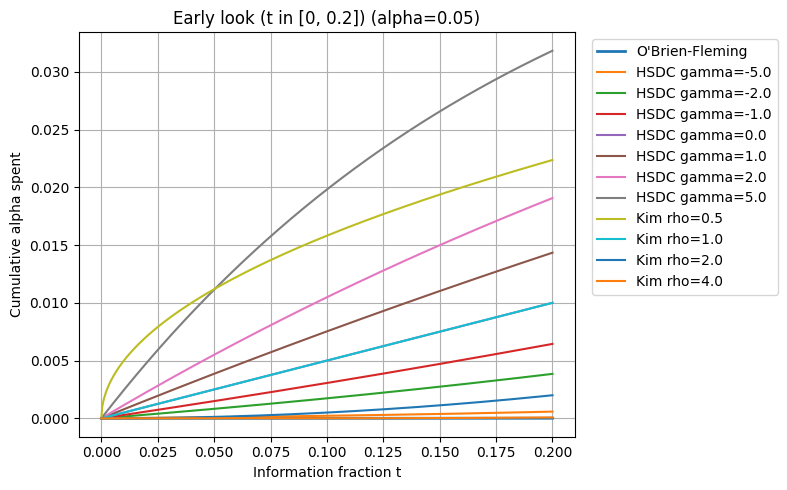

In [5]:
# Plot 2: close-up early t in [0,0.2]
t2 = np.linspace(0.0, 0.2, 501)
plt.figure(figsize=(8, 5))

plt.plot(t2, [obf.cumulative(tt) for tt in t2], label="O'Brien-Fleming", lw=2)
for g, obj in zip(hsdc_gammas, hsdc_objs):
    plt.plot(t2, [obj.cumulative(tt) for tt in t2], label=f"HSDC gamma={g}")
for r, obj in zip(kim_rhos, kim_objs):
    plt.plot(t2, [obj.cumulative(tt) for tt in t2], label=f"Kim rho={r}")
plt.xlabel("Information fraction t")
plt.ylabel("Cumulative alpha spent")
plt.title(f"Early look (t in [0, 0.2]) (alpha={Alpha})")
plt.legend(loc="upper left", bbox_to_anchor=(1.02, 1.0))
plt.grid(True)
plt.tight_layout()
plt.show()